In [140]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
from scipy.stats import norm
import json
import numpy as np
import re
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

sns.set_theme(palette="Set2")

In [141]:
with open("/content/result_movej_5_kg.txt", "r") as f:
    text = f.read().replace('\n', '')

json_objects = re.findall(r'\{.*?\}(?=\{|\s*$)', text)

parsed = [json.loads(obj) for obj in json_objects]

all_metrics = []
for obj in parsed:
    all_metrics.extend(obj["metrics"])

#графички и анализ их на глаз

In [142]:
times         = np.array([m["time"] for m in all_metrics])
joint_current = np.array([m["joint_current"] for m in all_metrics])
joint_voltage = np.array([m["joint_voltage"] for m in all_metrics])
joint_temp    = np.array([m["joint_temp"] for m in all_metrics])
joint_angle   = np.array([m["joint_angle"] for m in all_metrics])
joint_speed   = np.array([m["joint_speed"] for m in all_metrics])

In [143]:
datetimes = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f') for t in times]

# переводим в секунды относительно первого времени
x = np.array([(t - datetimes[0]).total_seconds() for t in datetimes])

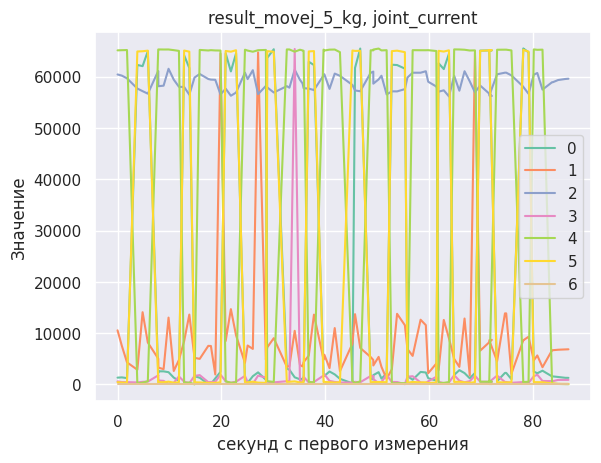

In [144]:
for col in range(joint_current.shape[1]):
    plt.plot(x, joint_current[:, col], label=f'{col}')

plt.ylabel('Значение')
plt.xlabel('секунд с первого измерения')
plt.title('result_movej_5_kg, joint_current')
plt.legend()

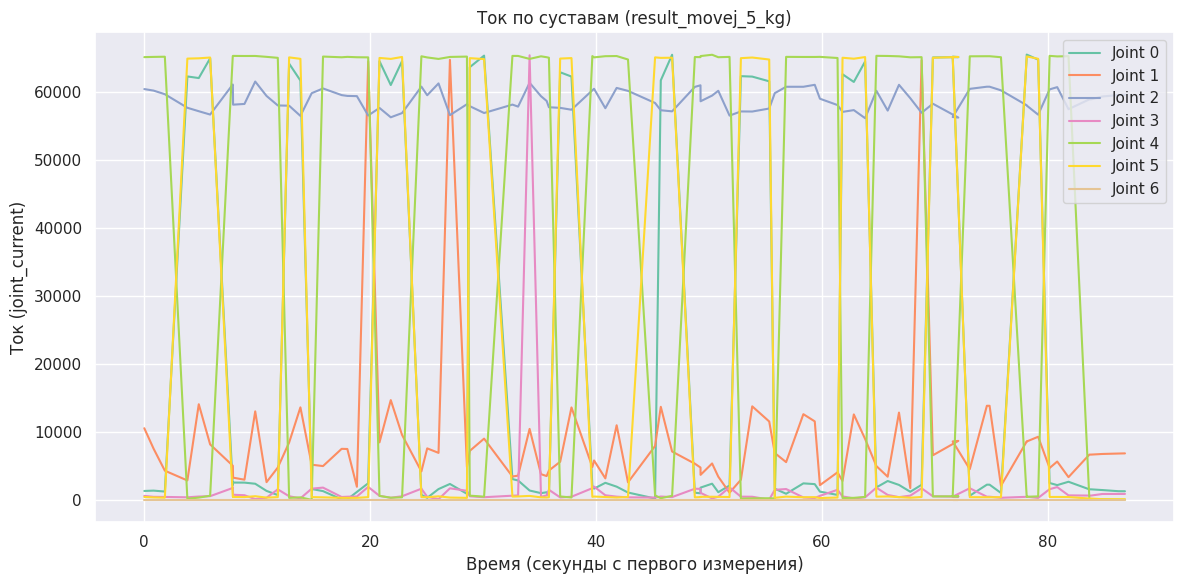

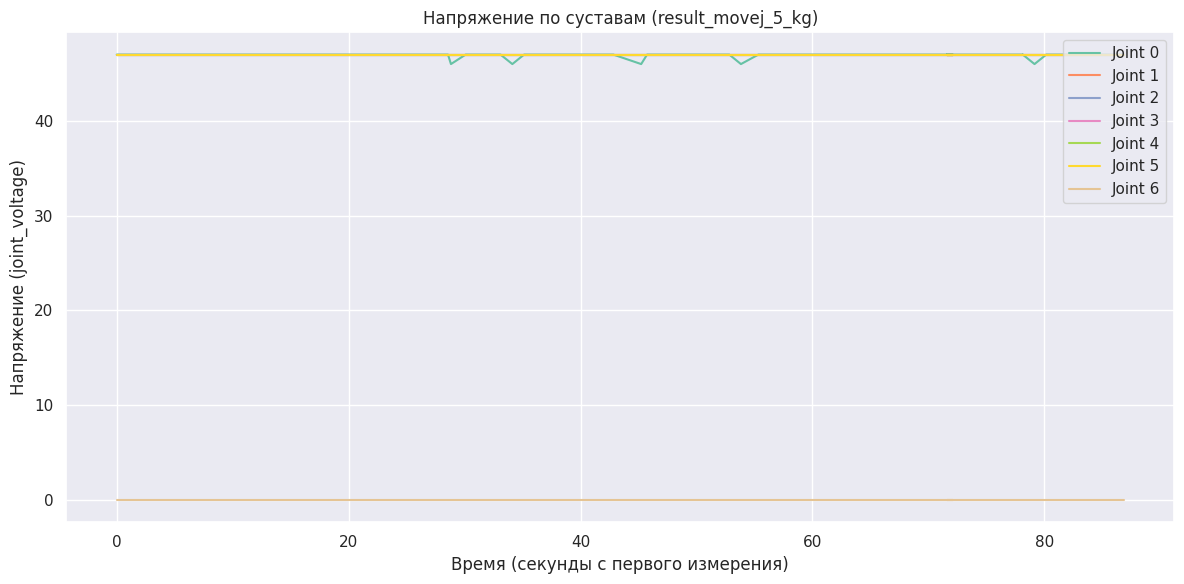

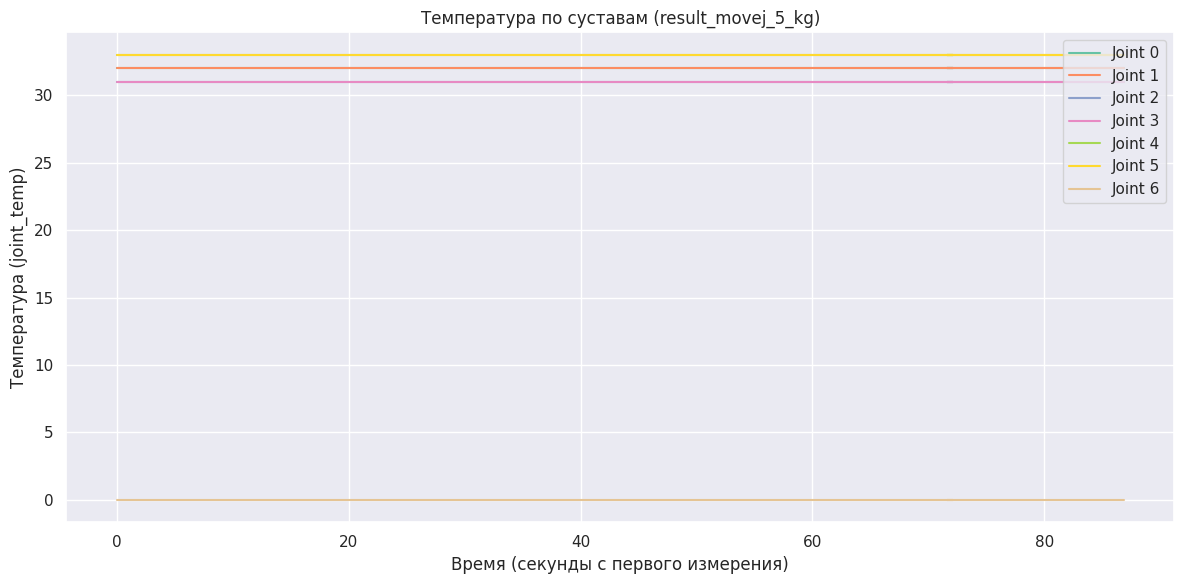

In [145]:
def plot_metric(x, data, ylabel, title):
    plt.figure(figsize=(12, 6))
    for col in range(data.shape[1]):
        plt.plot(x, data[:, col], label=f'Joint {col}')
    plt.xlabel('Время (секунды с первого измерения)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Построение графиков
plot_metric(x, joint_current, 'Ток (joint_current)', 'Ток по суставам (result_movej_5_kg)')
plot_metric(x, joint_voltage, 'Напряжение (joint_voltage)', 'Напряжение по суставам (result_movej_5_kg)')
plot_metric(x, joint_temp, 'Температура (joint_temp)', 'Температура по суставам (result_movej_5_kg)')

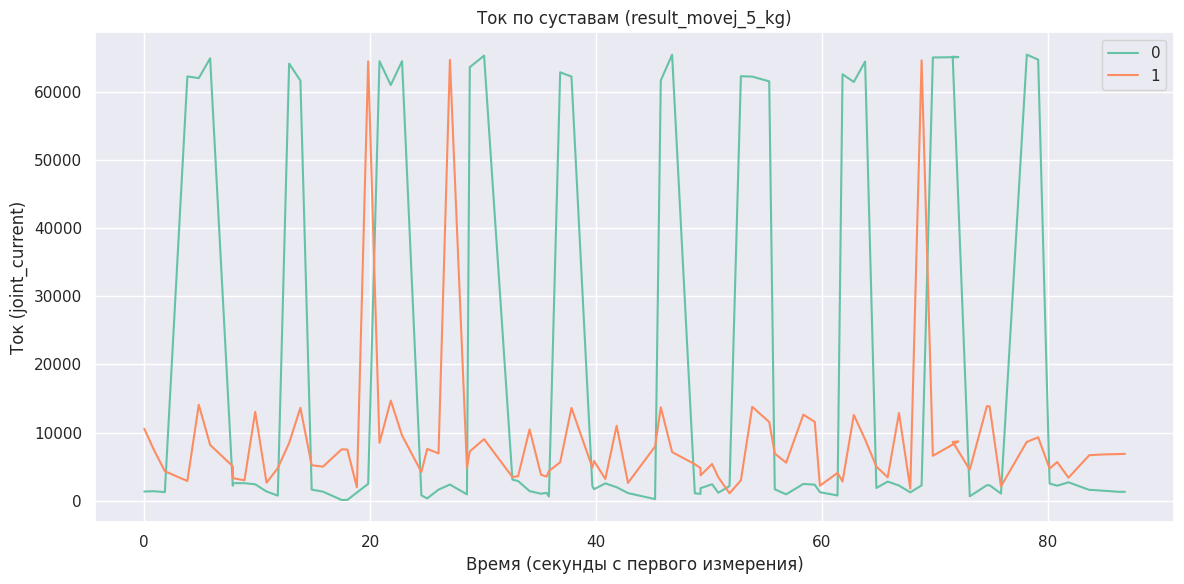

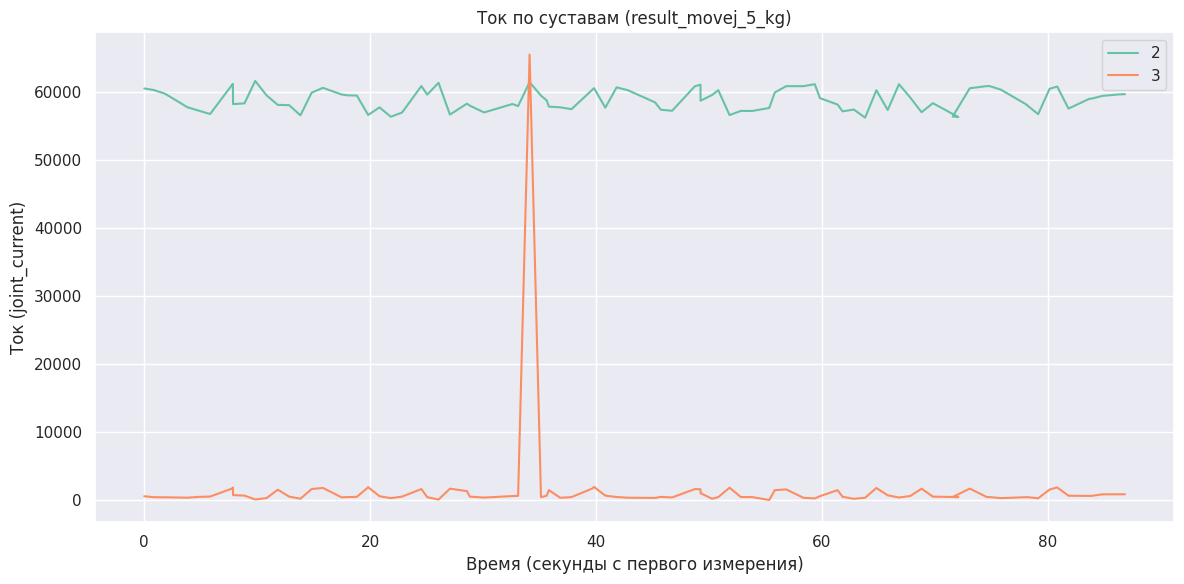

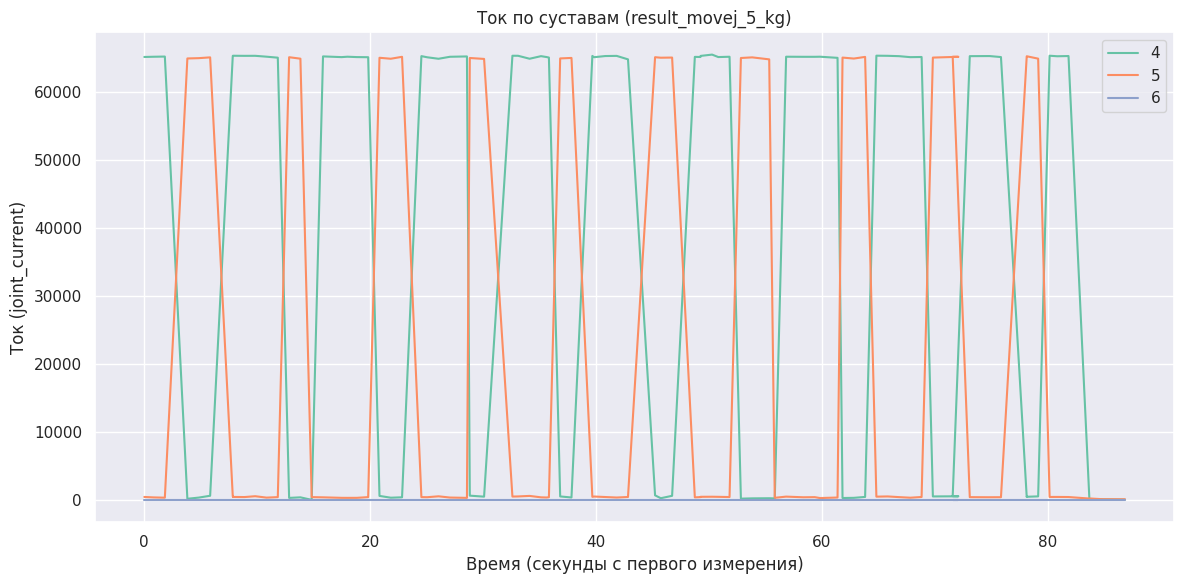

In [146]:
plt.figure(figsize=(12, 6))
for col in range(joint_current.shape[1]//3):
    plt.plot(x, joint_current[:, col], label=f'{col}')

plt.xlabel('Время (секунды с первого измерения)')
plt.ylabel('Ток (joint_current)')
plt.title('Ток по суставам (result_movej_5_kg)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for col in range(joint_current.shape[1]//3, 2*joint_current.shape[1]//3):
    plt.plot(x, joint_current[:, col], label=f'{col}')

plt.xlabel('Время (секунды с первого измерения)')
plt.ylabel('Ток (joint_current)')
plt.title('Ток по суставам (result_movej_5_kg)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for col in range(2*joint_current.shape[1]//3, joint_current.shape[1]):
    plt.plot(x, joint_current[:, col], label=f'{col}')

plt.xlabel('Время (секунды с первого измерения)')
plt.ylabel('Ток (joint_current)')
plt.title('Ток по суставам (result_movej_5_kg)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()



---



---



In [147]:
n = 0
def edit_df(df):
    return np.where(df>2**16//2,df - 2**16, df)

# joint_speed_edit = np.where(joint_speed[:,n]>2**16//2,joint_speed[:,n] - 2**16, joint_speed[:,n])
joint_speed_edit = edit_df(joint_speed[:,n])

/tmp/ipython-input-21587222.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


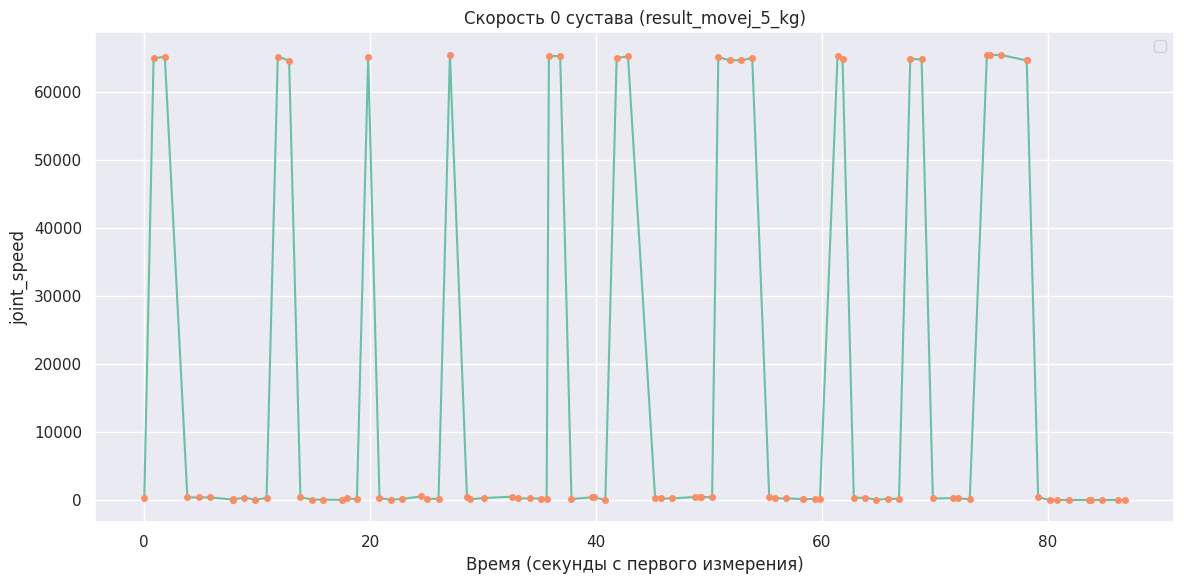

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(x, joint_speed[:,0])
plt.plot(x, joint_speed[:,0], 'o', ms = 4)
plt.xlabel('Время (секунды с первого измерения)')
plt.ylabel('joint_speed')
plt.title('Скорость 0 сустава (result_movej_5_kg)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-341993987.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


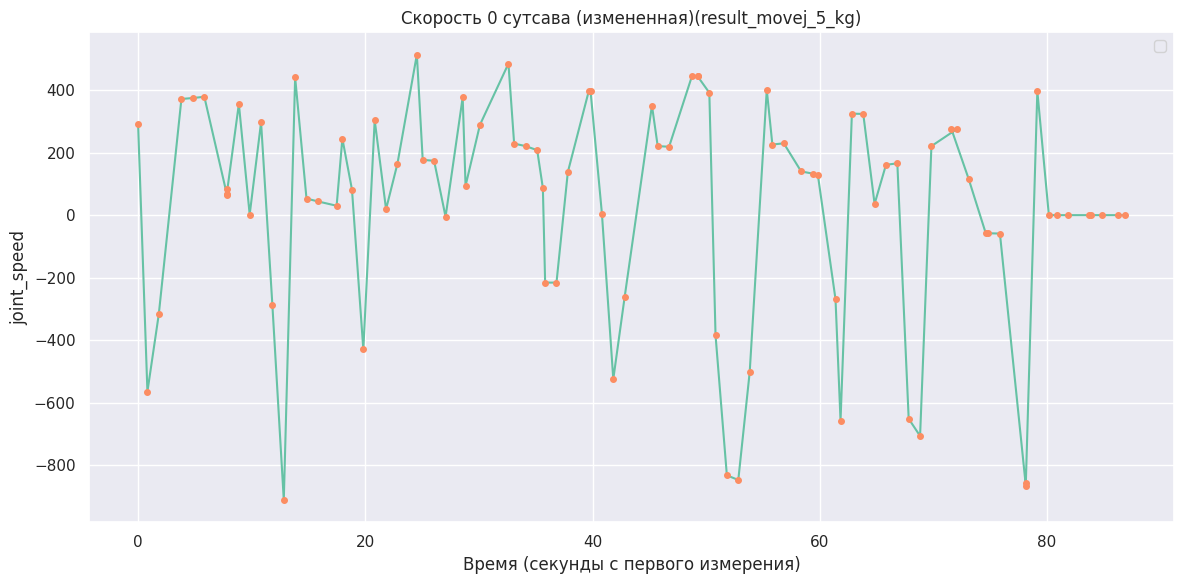

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(x, joint_speed_edit)
plt.plot(x, joint_speed_edit, 'o', ms = 4)
plt.xlabel('Время (секунды с первого измерения)')
plt.ylabel('joint_speed')
plt.title('Скорость 0 сутсава (измененная)(result_movej_5_kg)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2037421351.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


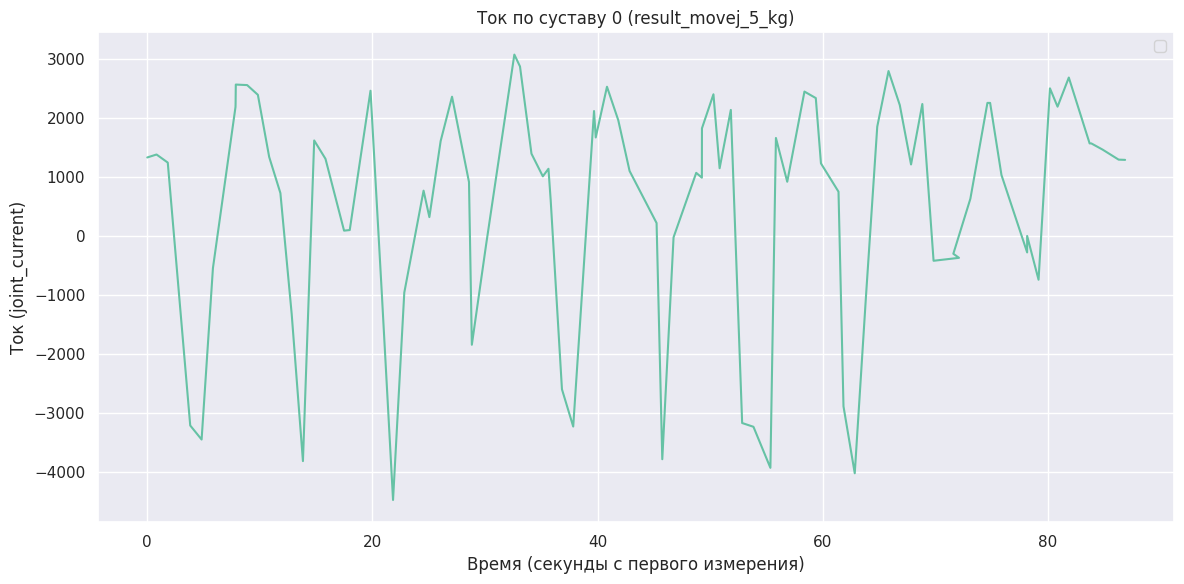

In [150]:
joint_current_edit = edit_df(joint_current[:, 0])

plt.figure(figsize=(12, 6))
plt.plot(x, joint_current_edit)

plt.xlabel('Время (секунды с первого измерения)')
plt.ylabel('Ток (joint_current)')
plt.title('Ток по суставу 0 (result_movej_5_kg)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3222196410.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


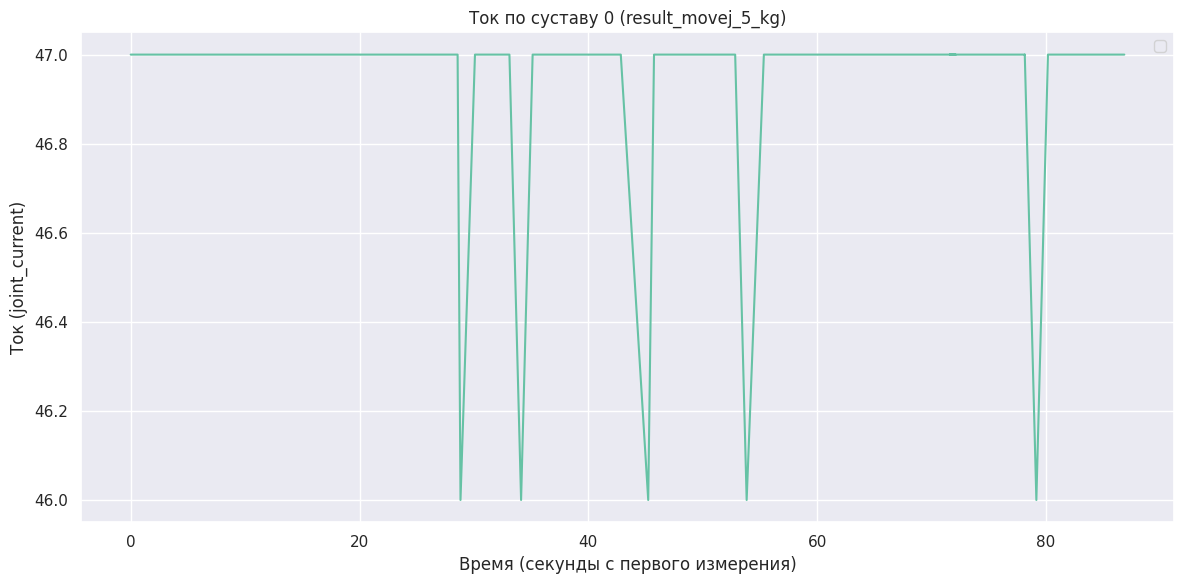

In [151]:
joint_voltage_edit = edit_df(joint_voltage[:, 0])

plt.figure(figsize=(12, 6))
plt.plot(x, joint_voltage_edit)

plt.xlabel('Время (секунды с первого измерения)')
plt.ylabel('Ток (joint_current)')
plt.title('Ток по суставу 0 (result_movej_5_kg)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

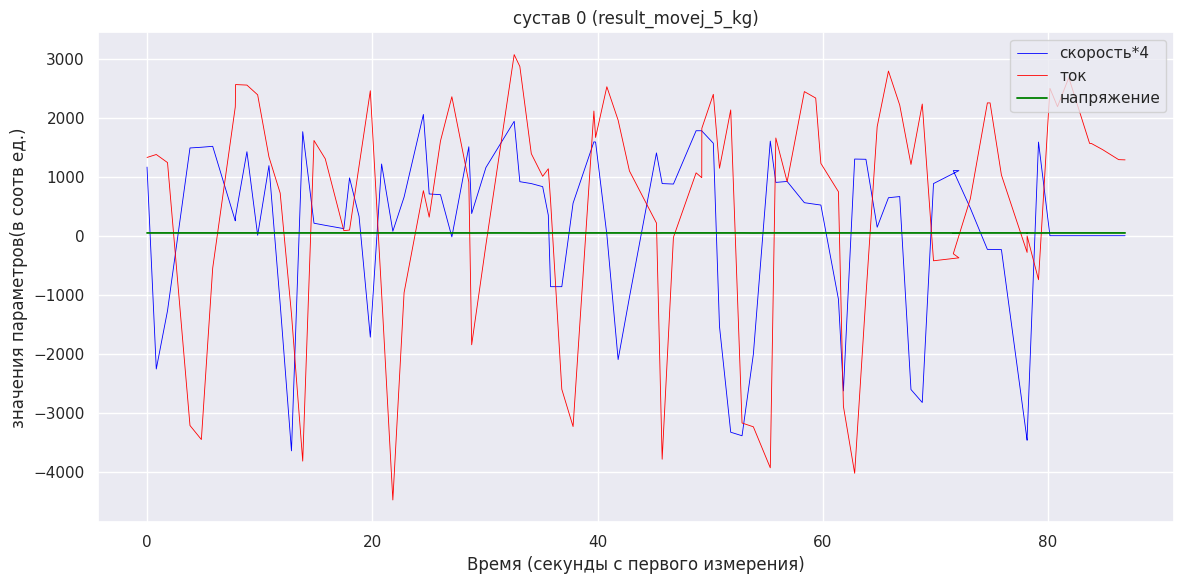

In [152]:
plt.figure(figsize=(12, 6))
plt.plot(x, joint_speed_edit*4, label = 'скорость*4', color = 'b', lw = 0.6)
plt.plot(x, joint_current_edit, label = 'ток', color = 'r', lw = 0.6)
plt.plot(x, joint_voltage_edit, label = 'напряжение', color = 'g', lw = 1.3)

plt.xlabel('Время (секунды с первого измерения)')
plt.ylabel('значения параметров(в соотв ед.)')
plt.title('сустав 0 (result_movej_5_kg)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()



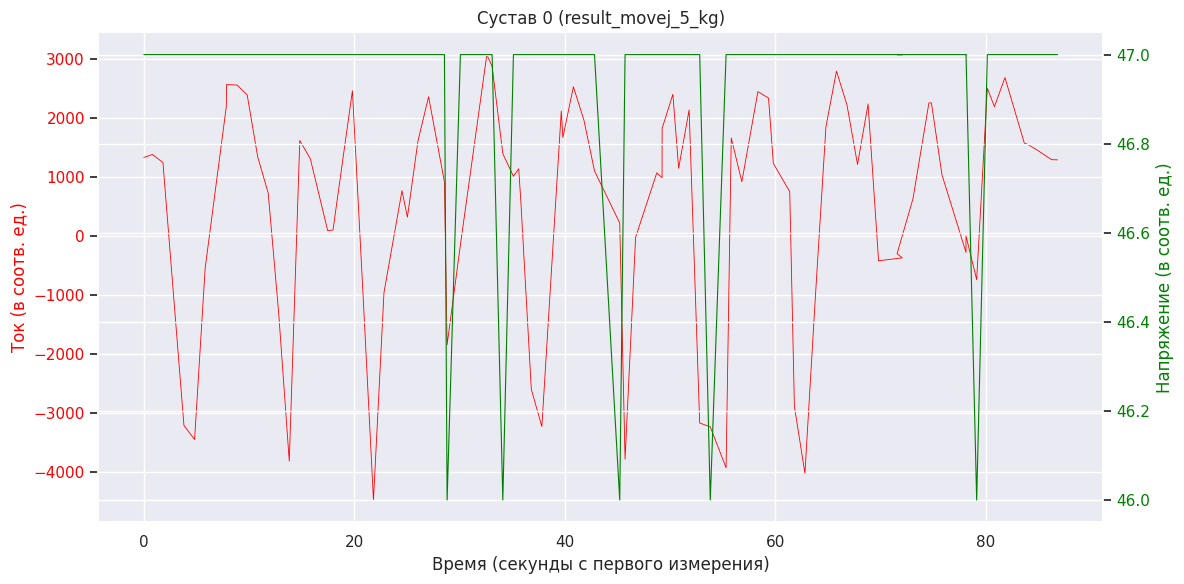

In [153]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Первый график — ток
ax1.plot(x, joint_current_edit, label='Ток', color='r', lw=0.6)
ax1.set_xlabel('Время (секунды с первого измерения)')
ax1.set_ylabel('Ток (в соотв. ед.)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Второй график — напряжение, отдельная ось Y
ax2 = ax1.twinx()
ax2.plot(x, joint_voltage_edit, label='Напряжение', color='g', lw=0.8)
ax2.set_ylabel('Напряжение (в соотв. ед.)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Заголовок, сетка, и аккуратный layout
plt.title('Сустав 0 (result_movej_5_kg)')
ax1.grid(True)
fig.tight_layout()
plt.show()




---



#тут уже нейронки

In [154]:
df_raw = pd.DataFrame(all_metrics)
df_exploded = df_raw.explode(list(df_raw.columns[2:]), ignore_index=True)
df_exploded["privod"] = df_exploded.groupby("time").cumcount() + 1

times = [np.datetime64(i) for i in  df_exploded.time.to_numpy()]
seconds = (times-times[0])/np.timedelta64(1, 's')
seconds
df_exploded['time'] = seconds

df_exploded

,robotId,time,joint_current,joint_voltage,joint_temp,joint_angle,joint_speed,privod
0,1103,0.000000,1327,47,32,2645,291,1
1,1103,0.000000,10556,47,32,241,64953,2
2,1103,0.000000,60460,47,31,2349,65371,3
3,1103,0.000000,604,47,31,596,598,4
4,1103,0.000000,65161,47,33,1557,65510,5
...,...,...,...,...,...,...,...,...
611,1103,86.842312,59627,47,31,2075,0,3
612,1103,86.842312,892,47,31,838,0,4
613,1103,86.842312,54,47,33,1609,0,5
614,1103,86.842312,109,47,33,64579,0,6


In [155]:
df_1 = pd.concat([df_exploded.copy() for i in range(10)], axis=0)
dt = df_exploded.time[7]-df_exploded.time[0]
df_1['time'] = [(i//7)*dt for i in range(df_1.shape[0])]

df_1 = df_1.drop('robotId', axis=1)
df_1 = df_1.drop('joint_speed', axis=1)
df_1 = df_1[df_1['privod'] != 7]
df_1 = df_1.reset_index(drop = 'false')

def edit_df(df):
    return np.where(df>2**16//2,df - 2**16, df)

df_1['joint_current'] = edit_df(df_1['joint_current'])
df_1['joint_voltage'] = edit_df(df_1['joint_voltage'])
# df_1['joint_speed'] = edit_df(df_1['joint_speed'])
df_1['joint_angle'] = edit_df(df_1['joint_angle'])


def get_diff(df, column):
    return  df.groupby('privod').apply(
        lambda g: g[column].diff() / g['time'].diff()
        ).reset_index(level=0, drop=True).fillna(0)

df_1['joint_speed'] = get_diff(df_1, 'joint_angle')
df_1['joint_acceleration'] = get_diff(df_1, 'joint_speed')

df_1['power'] = df_1['joint_speed'] * df_1['joint_acceleration']
df_1['flag'] = 0 # наличие ошибки в этой точке

n_privod = len(df_1.privod.unique())

df_1

/tmp/ipython-input-3249816868.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return  df.groupby('privod').apply(
/tmp/ipython-input-3249816868.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).reset_index(level=0, drop=True).fillna(0)
/tmp/ipython-input-3249816868.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Eith

,time,joint_current,joint_voltage,joint_temp,joint_angle,privod,joint_speed,joint_acceleration,power,flag
0,0.000000,1327,47,32,2645,1,0.0,0.0,0.0,0
1,0.000000,10556,47,32,241,2,0.0,0.0,0.0,0
2,0.000000,-5076,47,31,2349,3,0.0,0.0,0.0,0
3,0.000000,604,47,31,596,4,0.0,0.0,0.0,0
4,0.000000,-375,47,33,1557,5,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
5275,721.771512,6857,47,32,-238,2,0.0,0.0,0.0,0
5276,721.771512,-5909,47,31,2075,3,0.0,0.0,0.0,0
5277,721.771512,892,47,31,838,4,0.0,0.0,0.0,0
5278,721.771512,54,47,33,1609,5,0.0,0.0,0.0,0


##КЗ

In [156]:
def simulate_short_circuit(df, fault_start_raw, duration_raw=20, current_mult=2):
    """
    Имитация короткого замыкания.

    df: DataFrame с колонками speed, current, temp, voltage
    fault_start: индекс начала КЗ
    duration: длительность (в отсчётах)
    current_mult: во сколько раз растёт ток
    """

    fault_start = (fault_start_raw)*6
    duration = duration_raw*6

    df_fault = df.copy()
    N = len(df)
    fault_end = min(fault_start + duration, N)
    mask = np.arange(N) >= fault_start

    # print(df.time[fault_start])

    # рост тока\
    # df_fault.loc[fault_start:fault_end, "joint_current"] *= current_mult
    df_fault.loc[fault_start:fault_end, "joint_current"] *= np.min([1.2, np.random.normal(loc=current_mult, scale = 0.5)])
    df_fault.loc[fault_start:fault_end, "joint_voltage"] *= 1
    df_fault.loc[fault_start:fault_end, "power"] *= np.random.uniform(0, 1)

    flag = np.zeros(N)
    flag[fault_start:fault_end] = 1
    df_fault['flag'] = flag

    # температура растёт быстрее
    df_fault.loc[mask, "joint_temp"] += (np.linspace(0, 20, mask.sum()) + np.random.uniform(-0.5, 0.5, size=mask.sum()))

    return df_fault

### подготовка данных(проверка)

In [157]:
ind_start = 60
df_test_raw = df_1.loc[:599]
df_test = simulate_short_circuit(df_test_raw, ind_start)
df_test

,time,joint_current,joint_voltage,joint_temp,joint_angle,privod,joint_speed,joint_acceleration,power,flag
0,0.000000,1327,47,32,2645,1,0.0,0.000000,0.0,0.0
1,0.000000,10556,47,32,241,2,0.0,0.000000,0.0,0.0
2,0.000000,-5076,47,31,2349,3,0.0,0.000000,0.0,0.0
3,0.000000,604,47,31,596,4,0.0,0.000000,0.0,0.0
4,0.000000,-375,47,33,1557,5,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
595,81.291672,2622,47,51.824677,436,2,0.0,-999.627450,-0.0,0.0
596,81.291672,-6088,47,50.706931,2405,3,0.0,-489.431837,-0.0,0.0
597,81.291672,329,47,51.233416,396,4,0.0,655.542037,0.0,0.0
598,81.291672,-334,47,52.844016,1567,5,0.0,60.808198,0.0,0.0


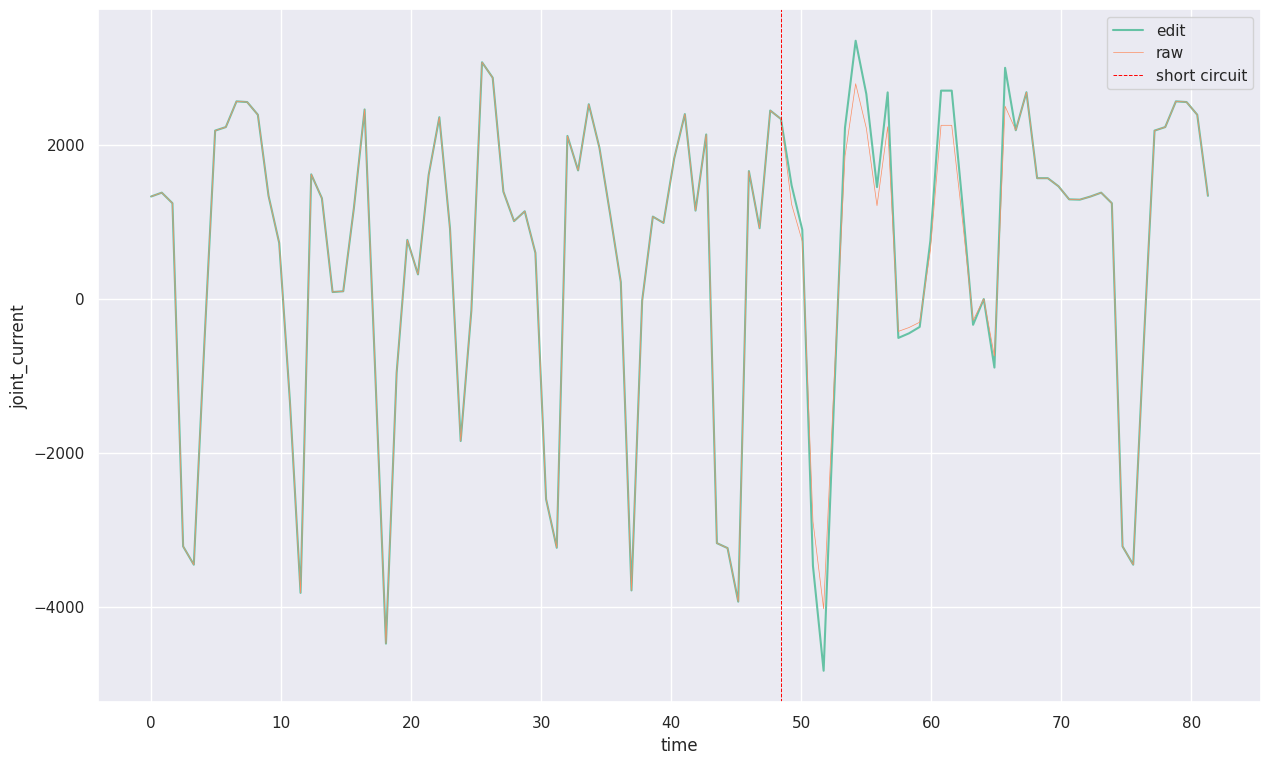

In [158]:
plt.figure(figsize=(15, 9))

slice_ = df_test[df_test['privod'] == 1]
plt.plot(slice_['time'], slice_['joint_current'], label = 'edit')

slice_raw = df_test_raw[df_test_raw['privod'] == 1]
plt.plot(slice_raw['time'], slice_raw['joint_current'], label = 'raw', lw = 0.5)

plt.ylabel('joint_current')
plt.xlabel('time')
plt.axvline(slice_['time'].iloc[ind_start-1], color = 'r', ls = '--', lw = 0.7, label = 'short circuit')
plt.legend()

Text(0.5, 0, 'time, s')

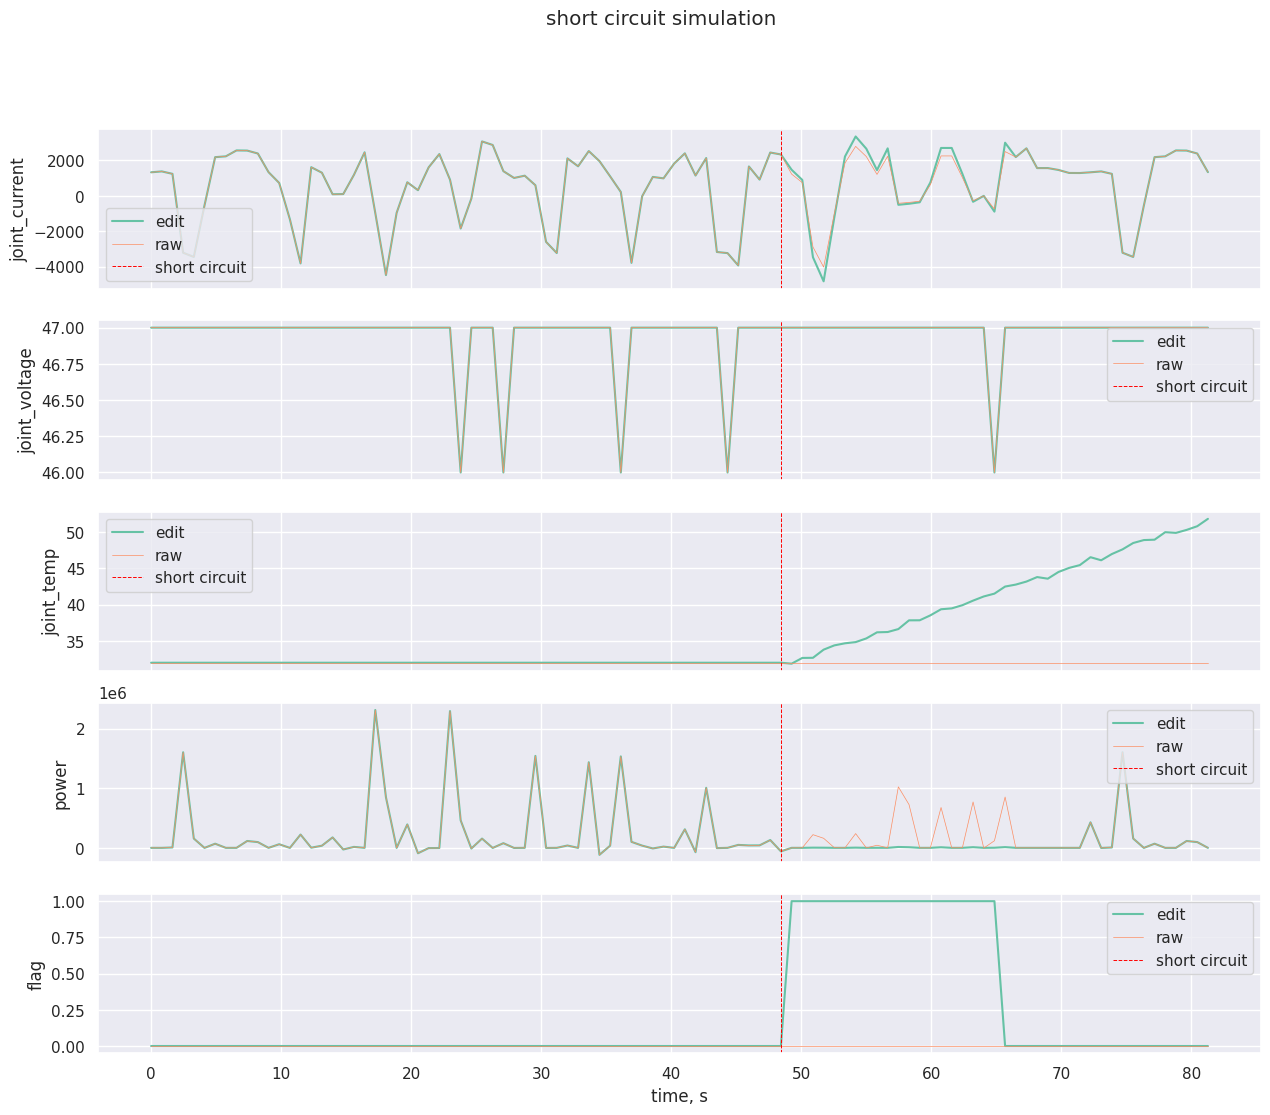

In [159]:
import matplotlib.pyplot as plt

signals = {
    "joint_current": "joint_current",
    "joint_voltage": "joint_voltage",
    "joint_temp": "joint_temp",
    # "joint_speed": "joint_speed",
    # "joint_acceleration": "joint_acceleration",
    "power": "power",
    "flag": "flag"
}

fig, axes = plt.subplots(len(signals), 1, figsize=(15, 12), sharex=True)
plt.suptitle('short circuit simulation')

slice_ = df_test[df_test['privod'] == 1]
slice_raw = df_test_raw[df_test_raw['privod'] == 1]

for ax, (col, ylabel) in zip(axes, signals.items()):

    ax.plot(slice_['time'], slice_[col], label="edit")

    ax.plot(slice_raw['time'], slice_raw[col], label="raw", lw=0.5)

    ax.axvline(slice_['time'].iloc[ind_start-1], color="r", ls="--", lw=0.7, label="short circuit")
    ax.set_ylabel(ylabel)
    ax.legend()

axes[-1].set_xlabel("time, s")

### обучение

In [160]:
df_2 = df_1.copy()

duration = 20
SC_count = 20
indexes = np.sort(np.random.randint(10, len(df_1)//6-10, SC_count))
real_indexes = []
last_index = -50
count = 0


for index in indexes:
    if (index-last_index) >= (duration+10):
        df_2 = simulate_short_circuit(df_2, index)
        last_index = index
        real_indexes.append(index)
        count += 1

print(count, '\n', list(map(int, real_indexes)))

14 
 [15, 87, 118, 207, 255, 310, 378, 432, 509, 562, 593, 677, 724, 845]


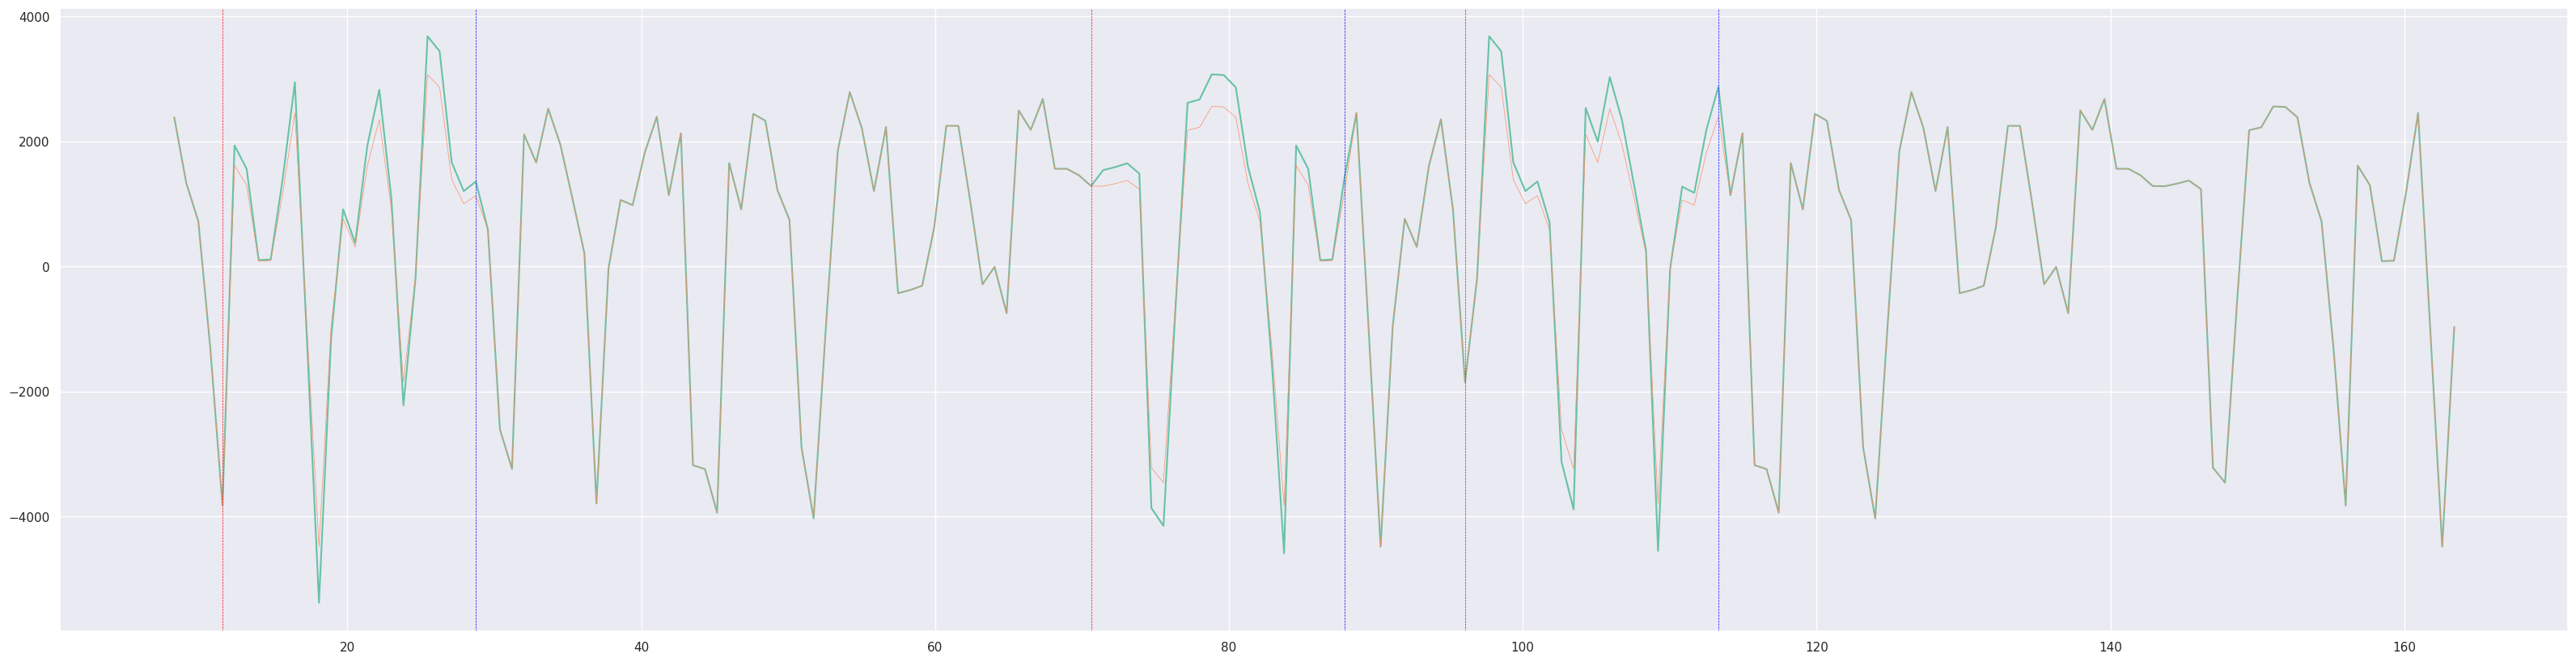

In [161]:
plt.figure(figsize=(40, 10))
st, en=10, 200
plt.plot(df_2.time[st*6:en*6:n_privod], df_2.joint_current[st*6:en*6:n_privod])
plt.plot(df_1.time[st*6:en*6:n_privod], df_1.joint_current[st*6:en*6:n_privod], lw = 0.5)
for ind in real_indexes:
    if ind  > st and ind < en:
        plt.axvline(df_2.time[ind*6-1], color = 'r', ls = '--', lw = 0.5)
        plt.axvline(df_2.time[ind*6+duration*6], color = 'b', ls = '--', lw = 0.5)


In [162]:
window = 20
threshold = 1/3

features = ["power",
            "joint_current", "joint_temp"]

statistics = ["mean", "std", "min", "max"]

col_names = []
for n in range(1, n_privod+1):
    for col in features:
        for stat in statistics:
            col_names.append(col + "_" + stat + "_" + str(n))

X, y = [], []

times = df_2["time"].unique()

for i in range(0, len(times) - window + 1):
    t_window = times[i:i+window]
    chunk = df_2[df_2["time"].isin(t_window)]

    row_features = []

    for privod in range(1, n_privod+1):
        sub = chunk[chunk["privod"] == privod]

        stats = []
        for col in features:
            stats.extend([
                sub[col].mean(),
                sub[col].std(),
                sub[col].min(),
                sub[col].max()])

        row_features.extend(stats)

    X.append(row_features)

    flag_ratio = chunk["flag"].mean()
    y.append(int(flag_ratio > threshold))

X = pd.DataFrame(X, columns = col_names)
y = np.array(y)


print("X shape:", X.shape)
print("y shape:", y.shape)
X

X shape: (861, 72)
y shape: (861,)


,power_mean_1,power_std_1,power_min_1,power_max_1,joint_current_mean_1,joint_current_std_1,joint_current_min_1,joint_current_max_1,joint_temp_mean_1,joint_temp_std_1,...,power_min_6,power_max_6,joint_current_mean_6,joint_current_std_6,joint_current_min_6,joint_current_max_6,joint_temp_mean_6,joint_temp_std_6,joint_temp_min_6,joint_temp_max_6
0,117234.819640,355812.473551,-2017.878371,1.604648e+06,534.37,2020.040219,-3822.0,2563.0,31.987351,0.102518,...,-2051.844492,1.591051e+06,195.31,432.135006,-627.0,553.0,33.031501,0.099524,32.812565,33.249611
1,117234.819640,355812.473551,-2017.878371,1.604648e+06,615.50,2085.086384,-3822.0,2949.6,31.998558,0.115413,...,-2051.844492,1.591051e+06,198.37,434.200440,-627.0,553.0,33.034536,0.099438,32.812565,33.249611
2,125702.357841,354889.778447,-2017.878371,1.604648e+06,488.45,2113.465890,-3822.0,2949.6,31.983253,0.134007,...,-2051.844492,1.591051e+06,149.78,466.124754,-627.0,553.0,33.022874,0.116000,32.766757,33.249611
3,128493.698180,354119.800584,-2017.878371,1.604648e+06,157.59,2476.411655,-5377.2,2949.6,32.004790,0.167312,...,-2051.844492,1.591051e+06,94.72,506.050084,-763.2,553.0,33.039763,0.135453,32.766757,33.337781
4,48259.152464,69340.188883,-2017.878371,2.231568e+05,260.59,2369.140064,-5377.2,2949.6,31.996424,0.171690,...,-2051.844492,2.218889e+05,103.35,495.020305,-763.2,553.0,33.047317,0.137318,32.766757,33.337781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,154347.482404,280596.902539,-4818.959102,8.534868e+05,1199.58,1430.676174,-1224.0,3350.4,294.496281,7.554572,...,-4804.509450,8.474143e+05,139.77,442.852996,-622.0,625.2,295.753911,7.231876,285.042211,307.426304
857,154300.411857,280624.068708,-4818.959102,8.534868e+05,1339.03,1313.106355,-746.0,3350.4,295.765595,7.607474,...,-4804.509450,8.474143e+05,172.23,421.457977,-622.0,625.2,296.978666,7.495169,285.042211,310.117669
858,154300.471178,280624.034374,-4818.959102,8.534868e+05,1301.09,1297.214979,-746.0,3350.4,297.011668,7.641124,...,-4804.509450,8.474143e+05,148.59,410.086971,-622.0,625.2,298.235427,7.495659,287.674392,310.177432
859,150370.658908,282285.387676,-4818.959102,8.534868e+05,1198.07,1204.394507,-746.0,2682.0,298.154403,7.470455,...,-4804.509450,8.474143e+05,122.78,394.457810,-622.0,526.8,299.283240,7.617288,287.674392,310.177432


In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=5,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[417   0]
 [  0  14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       417
           1       1.00      1.00      1.00        14

    accuracy                           1.00       431
   macro avg       1.00      1.00      1.00       431
weighted avg       1.00      1.00      1.00       431



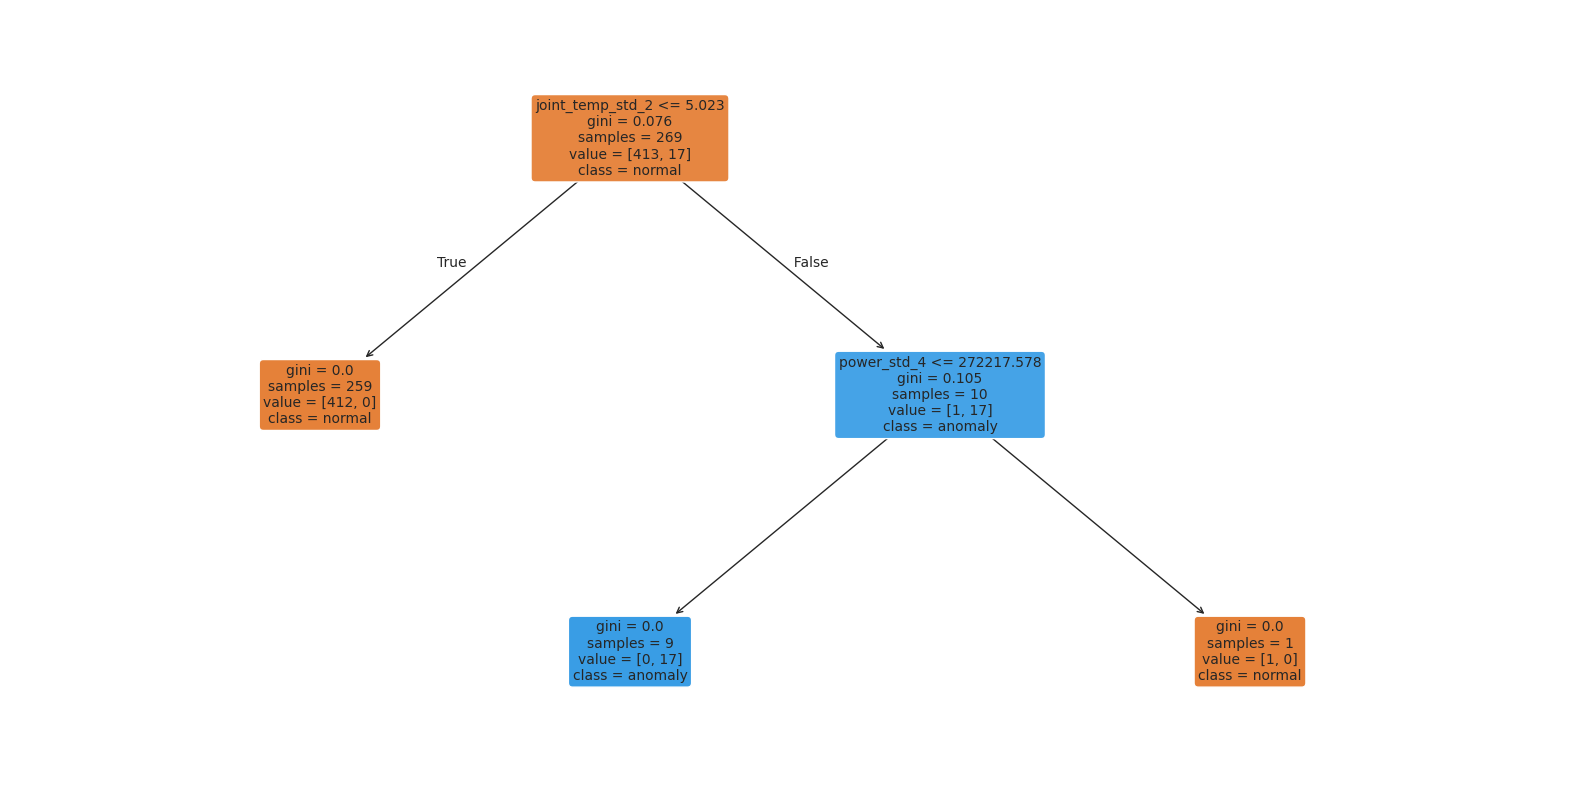

In [164]:
from sklearn.tree import plot_tree

tree = rf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names=X.columns,
          class_names=['normal','anomaly'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()